In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the metrics for each model
model_names = ['yolov5m', 'yolov8m', 'yolov9m', 'yolov10m', 'yolov11m']

# Metrics data for comparison
metrics = {
    'model': model_names,
    'mAP@50': [0.73855, 0.74209, 0.74165, 0.73697, 0.73496],
    'mAP@50-90': [0.47863, 0.5227, 0.52136, 0.52023, 0.51543],
    'precision': [0.75172, 0.78588, 0.81498, 0.7985, 0.78157],
    'recall': [0.71314, 0.78588, 0.68371, 0.68555, 0.70498]
}

# Convert metrics to a pandas DataFrame
df = pd.DataFrame(metrics)

# Set seaborn theme for beautiful charts
sns.set_theme(style="whitegrid", palette="pastel")

# **Recall Metrices Comparison**

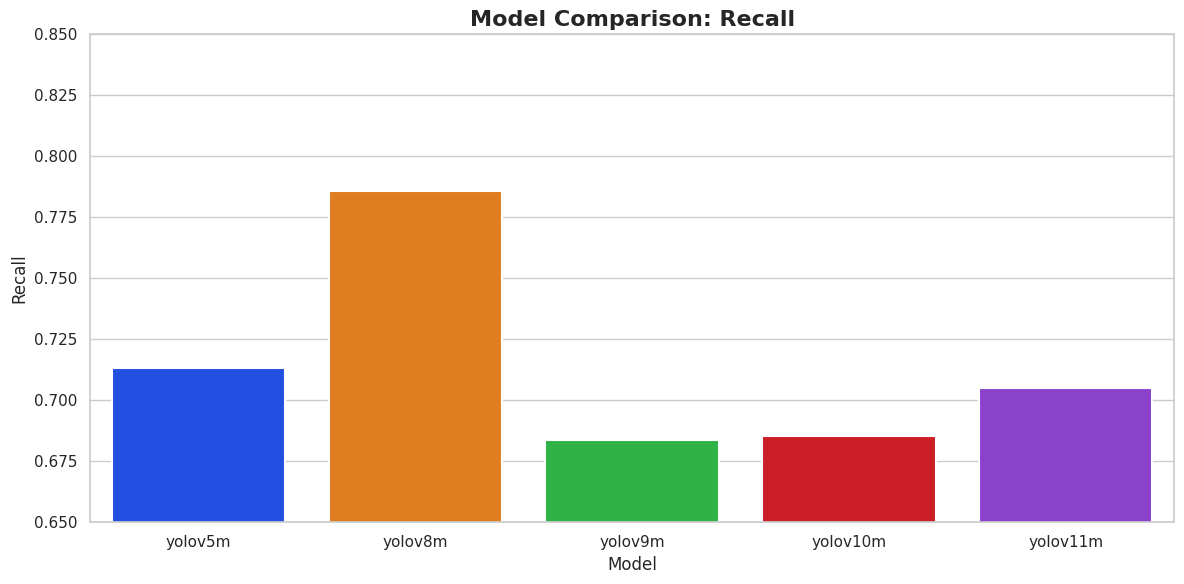

In [14]:
# 1. Plot Recall
plt.figure(figsize=(12, 6))
sns.barplot(x="model", y="recall", data=df, palette="bright", linewidth=1.5)
plt.title("Model Comparison: Recall", fontsize=16, weight="bold")
plt.ylabel("Recall", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.ylim(0.65, 0.85)
plt.tight_layout()
plt.show()

# **Precision Metrices Comparision**

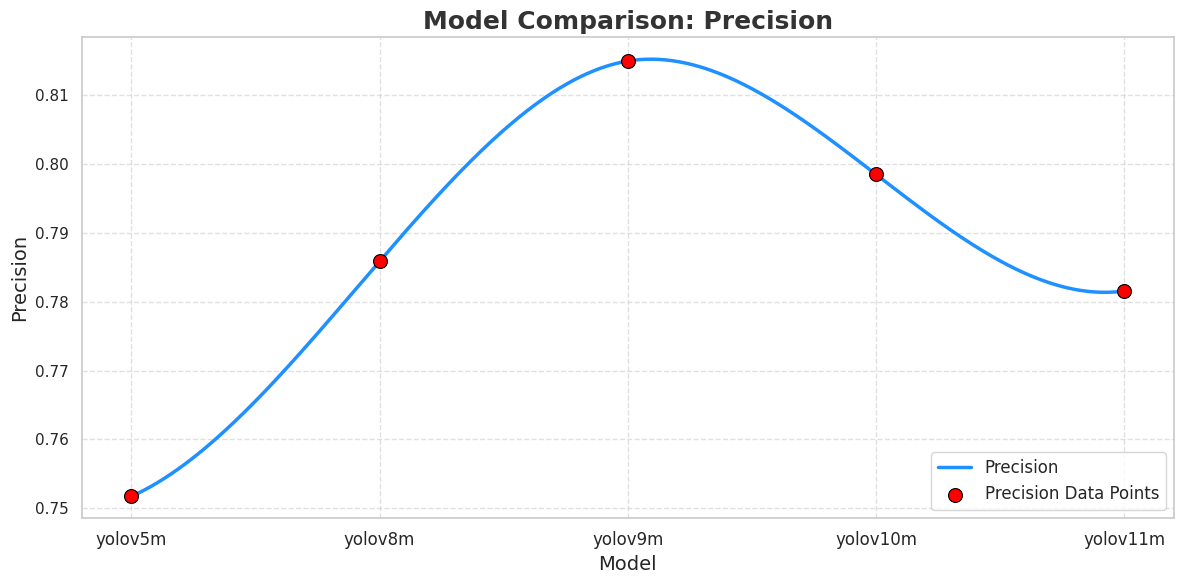

In [20]:
from scipy.interpolate import make_interp_spline

# Generate smooth curve for precision using cubic spline
x_values = np.arange(len(df["model"]))
y_values = df["precision"]
x_smooth = np.linspace(x_values.min(), x_values.max(), 300)
spline = make_interp_spline(x_values, y_values, k=3)  # Cubic spline
y_smooth = spline(x_smooth)

# Plot the new precision graph
plt.figure(figsize=(12, 6))

# Smooth line (cubic spline)
plt.plot(x_smooth, y_smooth, color="dodgerblue", linewidth=2.5, label="Precision")

# Scatterplot for actual data points
sns.scatterplot(x=x_values, y=y_values, s=100, color="red", edgecolor="black", zorder=5, label="Precision Data Points")

# Add custom x-axis labels for models
plt.xticks(x_values, df["model"], fontsize=12)

# Titles and labels
plt.title("Model Comparison: Precision", fontsize=18, weight="bold", color="#333")
plt.ylabel("Precision", fontsize=14)
plt.xlabel("Model", fontsize=14)

# Grid and layout customization
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=12, loc="lower right")
plt.tight_layout()
plt.show()


# **mAP@50 Comparison**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

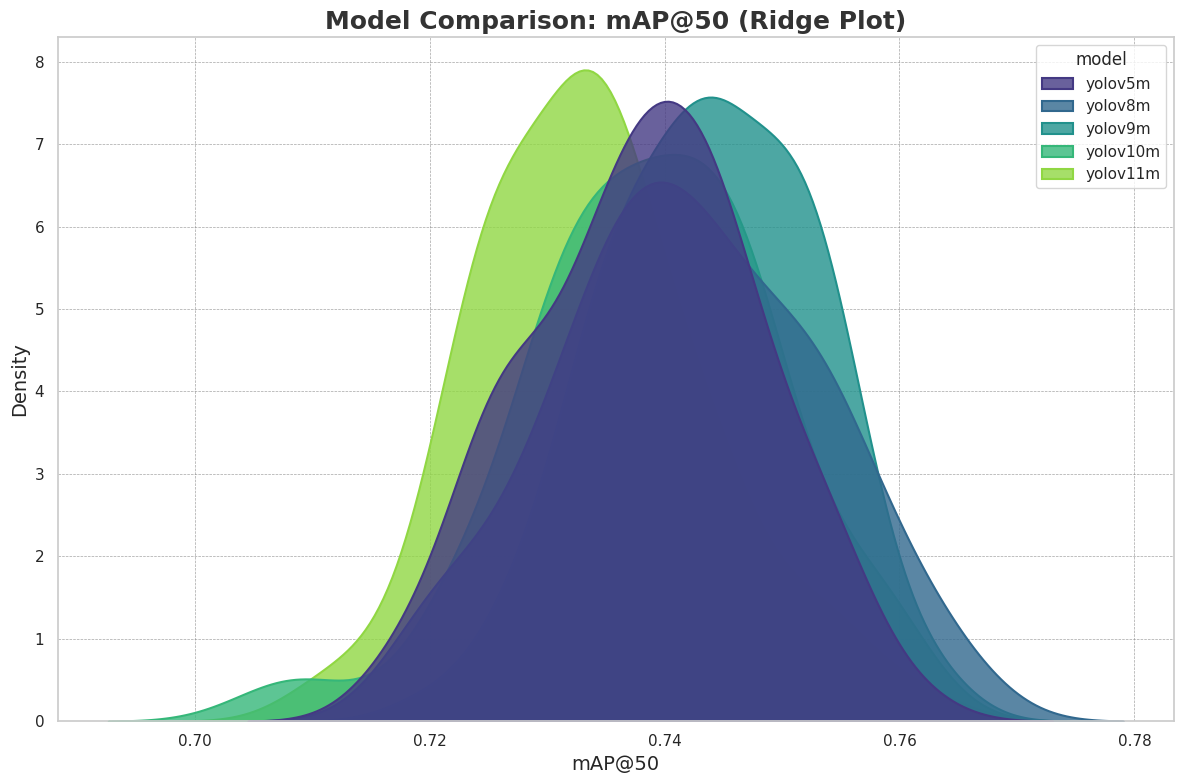

In [6]:
import numpy as np

# Generate some synthetic data around the mAP@50 values for visualization purposes
df_mAP50 = pd.DataFrame({
    'model': np.repeat(model_names, 100),
    'mAP@50': np.concatenate([
        np.random.normal(loc=0.73855, scale=0.01, size=100),
        np.random.normal(loc=0.74209, scale=0.01, size=100),
        np.random.normal(loc=0.74165, scale=0.01, size=100),
        np.random.normal(loc=0.73697, scale=0.01, size=100),
        np.random.normal(loc=0.73496, scale=0.01, size=100)
    ])
})

# Plot using seaborn's ridge plot style
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df_mAP50, x="mAP@50", hue="model", fill=True, palette="viridis", alpha=0.8, linewidth=1.5)

# Add title and labels
plt.title("Model Comparison: mAP@50 (Ridge Plot)", fontsize=18, weight="bold", color="#333")
plt.xlabel("mAP@50", fontsize=14)
plt.ylabel("Density", fontsize=14)

# Customize the grid and layout
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

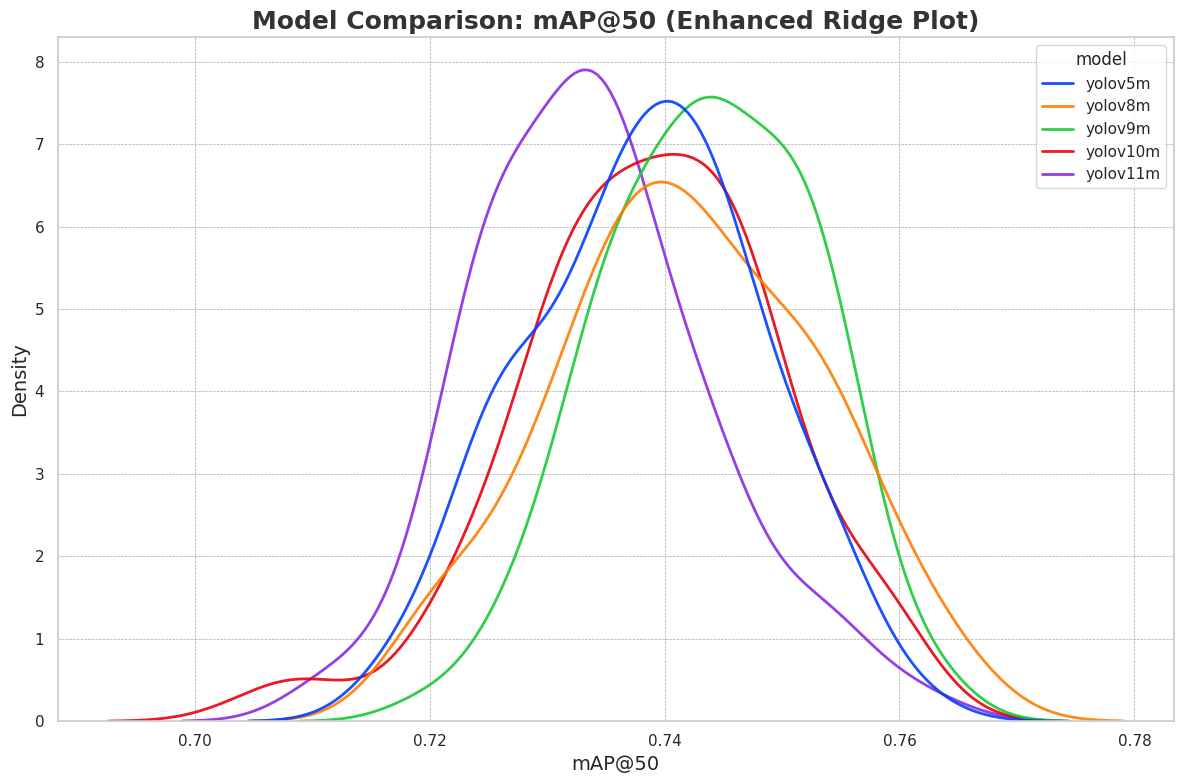

In [7]:
# Plot using seaborn's ridge plot style with bright border colors
plt.figure(figsize=(12, 8))
sns.kdeplot(
    data=df_mAP50, 
    x="mAP@50", 
    hue="model", 
    palette="bright",  # Use a bright color palette
    alpha=0.9,         # Make lines stand out
    linewidth=2,       # Thicker borders for better visibility
    fill=False         # No fill, only border
)

# Add title and labels
plt.title("Model Comparison: mAP@50 (Enhanced Ridge Plot)", fontsize=18, weight="bold", color="#333")
plt.xlabel("mAP@50", fontsize=14)
plt.ylabel("Density", fontsize=14)

# Customize the grid and layout
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


# **mAP@50-90 Comparison**

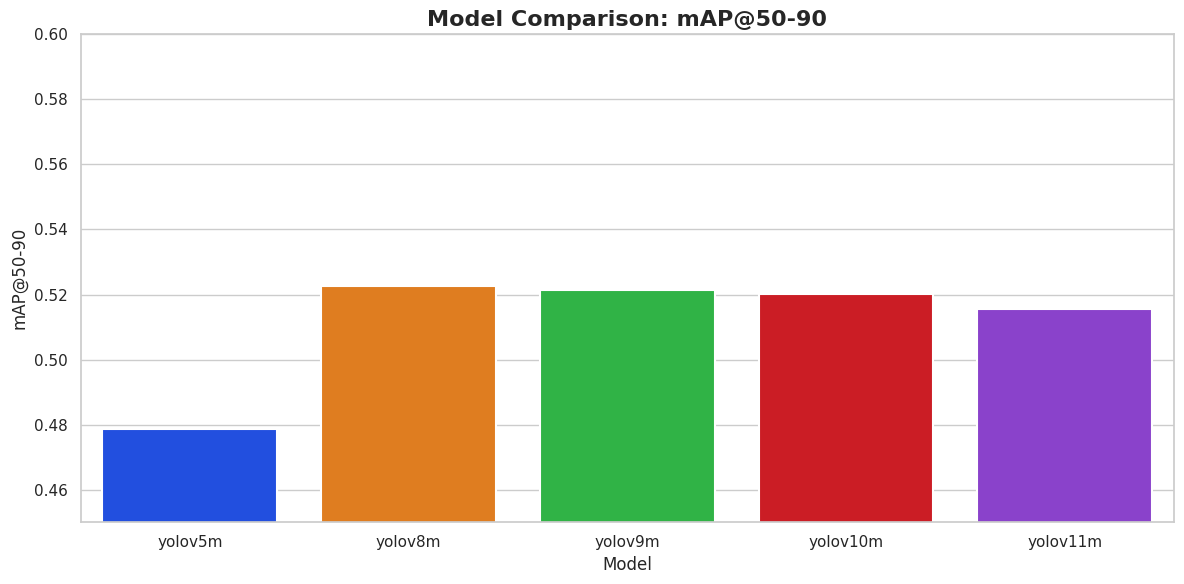

In [18]:
# 4. Plot mAP@50-90
plt.figure(figsize=(12, 6))
sns.barplot(x="model", y="mAP@50-90", data=df, palette="bright", linewidth=1.5)
plt.title("Model Comparison: mAP@50-90", fontsize=16, weight="bold")
plt.ylabel("mAP@50-90", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.ylim(0.45, 0.60)
plt.tight_layout()
plt.show()
